## NLP : AMAZON-REVIEW ANALYSIS USING NAIVE BAYES ALGORITHM

Task #1: Understand the Problem Statement and business case

Task #2: Import libraries and datasets

Task #3: Perform Exploratory Data Analysis

Task #4: Plot the WORD CLOUD

Task #5: Create a Pipeline to remove Punctuations, Stopwords and perform COUNT VECTORIZATION

Task #6: Train a Naive Bayes Classifier

Task #7: Assess trained model performance

## Task #2: Import Liabraries and Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from wordcloud import WordCloud

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 



In [3]:
# Loading Dataset
amazon_df=pd.read_csv("amazon_reviews.csv")
amazon_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
amazon_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
amazon_df.shape

(3150, 5)

In [8]:
amazon_df['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [9]:
amazon_df['feedback'].unique()

array([1, 0], dtype=int64)

## Task #3: Perform Exploratory Data Analysis

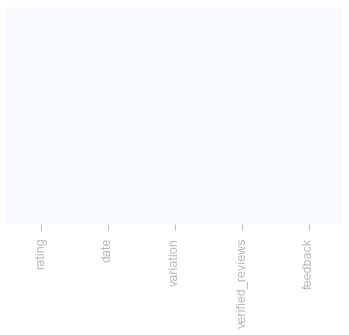

In [10]:
# Wanted to check that is there any NULL values in our dataset

sns.heatmap(amazon_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

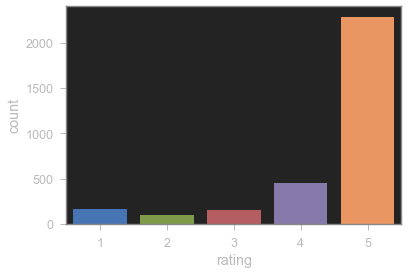

In [11]:
sns.countplot(x=amazon_df['rating'])

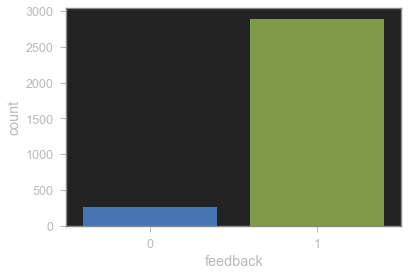

In [12]:
sns.countplot(x=amazon_df['feedback'])

In [14]:
amazon_df['length']=amazon_df['verified_reviews'].apply(len)
amazon_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


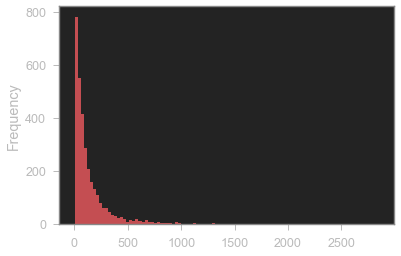

In [19]:
amazon_df['length'].plot(bins=100,kind='hist',color='r')

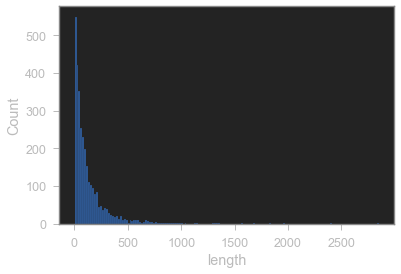

In [18]:
sns.histplot(data=amazon_df,x='length')

## Task #4: Plot the WORD CLOUD

In [33]:
amazon_positive_reviews=amazon_df[amazon_df['feedback']==1]
amazon_positive_reviews=amazon_positive_reviews['verified_reviews'].to_list()
positive_sentence=' '.join(amazon_positive_reviews)

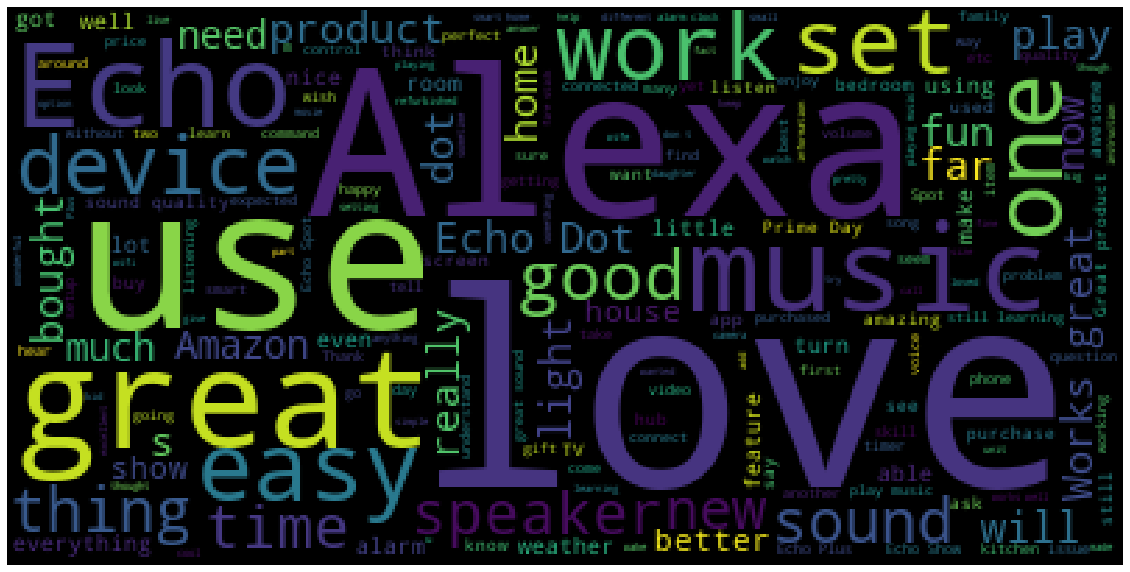

In [34]:
word_cloud=WordCloud().generate(positive_sentence) # generating word cloud

plt.figure(figsize=(20,20))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [35]:
amazon_negative_reviews=amazon_df[amazon_df['feedback']==0]
amazon_negative_reviews=amazon_negative_reviews['verified_reviews'].to_list()
negative_sentence=' '.join(amazon_negative_reviews)

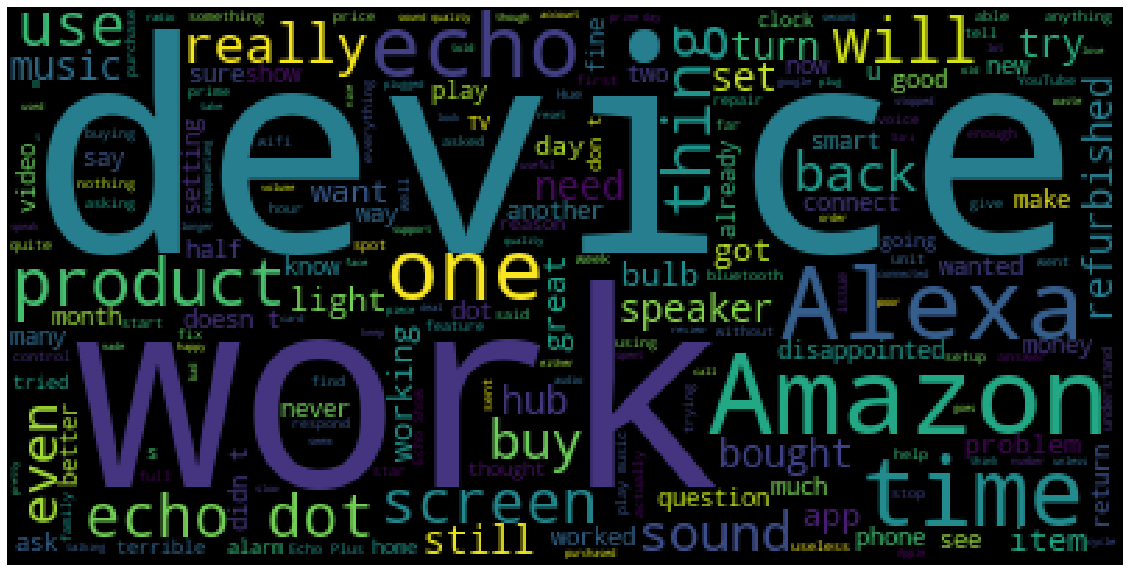

In [36]:
negative_cloud=WordCloud().generate(negative_sentence)

plt.figure(figsize=(20,20))
plt.imshow(negative_cloud)
plt.axis('off')
plt.show()

## Task #5: Create a Pipeline to remove Punctuations, Stopwords and perform COUNT VECTORIZATION

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
#stopwords.words('english')

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
clean_sentence=amazon_df['verified_reviews'].apply(message_cleaning)
clean_sentence[:10]

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
5    [received, echo, gift, needed, another, Blueto...
6    [Without, cellphone, cannot, use, many, featur...
7    [think, 5th, one, Ive, purchased, Im, working,...
8                                       [looks, great]
9    [Love, I’ve, listened, songs, haven’t, heard, ...
Name: verified_reviews, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=message_cleaning,dtype = np.uint8)
count_vectorizer=vectorizer.fit_transform(amazon_df['verified_reviews'])

In [41]:
count_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Task #6: Train a Naive Bayes Classifier

In [43]:
X=pd.DataFrame(count_vectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y=amazon_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64